# Data Cleaning and EDA

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime as dt
import time
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re # Python's package for RegEx (Regular Expressions)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import time
pd.set_option('display.max_columns', None) # Displays all columns
from sklearn.feature_extraction import text

[nltk_data] Downloading package wordnet to /Users/ch/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ch/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
pwd!

'/Users/ch/Desktop/GA/Projects/project_3'

In [4]:
falloutresults = pd.read_csv('Datasets/falloutresults.csv', lineterminator='\n')

In [5]:
falloutresults.shape

(14625, 10)

In [6]:
nomansskyresults = pd.read_csv('Datasets/nomansskyresults.csv', lineterminator='\n')

In [7]:
nomansskyresults.shape

(14876, 10)

In [8]:
falloutresults.head(1)

,Unnamed: 0,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,0,What are your opinions on a melee only build i...,[removed],Fallout,1610352848,ARMOREDxDUKE,16,1,True,2021-01-11


In [9]:
nomansskyresults.head(1)

,Unnamed: 0,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,0,Help with hyperdrive mission,So I just got the hyperdrive and used it for t...,NoMansSkyTheGame,1611045501,ItzMattata,9,1,True,2021-01-19


In [10]:
bothsets = pd.concat([falloutresults, nomansskyresults], axis=0)

In [11]:
bothsets[['is_self']].sum()

is_self    29501
dtype: int64

In [12]:
# Drop Columns
bothsets = bothsets.drop(columns = ['Unnamed: 0','is_self'])

In [13]:
bothsets['selftextlength'] = bothsets['selftext'].str.len()
falloutresults['selftextlength'] = falloutresults['selftext'].str.len()
nomansskyresults['selftextlength'] = nomansskyresults['selftext'].str.len()

In [14]:
bothsets.head(1)

,title,selftext,subreddit,created_utc,author,num_comments,score,timestamp,selftextlength
0,What are your opinions on a melee only build i...,[removed],Fallout,1610352848,ARMOREDxDUKE,16,1,2021-01-11,9.0


In [15]:
bothsets['subreddit'].value_counts()

NoMansSkyTheGame    14876
Fallout             14625
Name: subreddit, dtype: int64

In [16]:
bothsets['selftextwordcount'] = bothsets['selftext'].str.split().str.len()
falloutresults['selftextwordcount'] = falloutresults['selftext'].str.split().str.len()
nomansskyresults['selftextwordcount'] = nomansskyresults['selftext'].str.split().str.len()

In [17]:
bothsets.sort_values('selftextwordcount',ascending=True).head(5).append(bothsets.sort_values('selftextwordcount',ascending=True).tail(5))

,title,selftext,subreddit,created_utc,author,num_comments,score,timestamp,selftextlength,selftextwordcount
14260,what if opportunity time is actually todd howa...,,Fallout,1413498799,LuigiIsFamos,11,0,2014-10-16,1.0,0.0
4306,[PS4] W: Your maps H: Caps. Im doing a treasur...,\n,Fallout,1554633721,DaveeBhoy,0,0,2019-04-07,1.0,0.0
0,What are your opinions on a melee only build i...,[removed],Fallout,1610352848,ARMOREDxDUKE,16,1,2021-01-11,9.0,1.0
7971,I found a reference that is either coincidenta...,[deleted],Fallout,1506715665,[deleted],0,1,2017-09-29,9.0,1.0
11176,"No Mans Sky's ""Procedually generated"" planets ...",[deleted],NoMansSkyTheGame,1464732180,[deleted],6,0,2016-05-31,9.0,1.0
14815,This is good news.,NaN,NoMansSkyTheGame,1430348331,[deleted],0,1,2015-04-29,NaN,NaN
14831,This is absolutely ridiculous!,NaN,NoMansSkyTheGame,1430504435,[deleted],7,1,2015-05-01,NaN,NaN
14832,a kind of release data ?,NaN,NoMansSkyTheGame,1430519181,andre1112,11,0,2015-05-01,NaN,NaN
14856,Considering Buying...,NaN,NoMansSkyTheGame,1430675229,HoneyBadger08,9,0,2015-05-03,NaN,NaN
14858,How can we get Sean Murray to put the soundtra...,NaN,NoMansSkyTheGame,1430681323,PickleSchmere,13,0,2015-05-03,NaN,NaN


In [18]:
bothsets['selftext'].value_counts(ascending=False)

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          3951
[deleted]                                                                                                                                                                                                                                                                                                                       

In [19]:
print(falloutresults.shape)
uniqueauthorsfallout = falloutresults['author'].value_counts().shape
uniqueauthorsfallout

(14625, 12)


(10829,)

In [20]:
print(nomansskyresults.shape)
uniqueauthorsnomans = nomansskyresults['author'].value_counts().shape
uniqueauthorsnomans

(14876, 12)


(9519,)

In [21]:
bothsets.dtypes

title                 object
selftext              object
subreddit             object
created_utc            int64
author                object
num_comments           int64
score                  int64
timestamp             object
selftextlength       float64
selftextwordcount    float64
dtype: object

In [22]:
bothsets.isnull().sum()

title                   0
selftext             1425
subreddit               0
created_utc             0
author                  0
num_comments            0
score                   0
timestamp               0
selftextlength       1425
selftextwordcount    1425
dtype: int64

In [23]:
def substituteincolumn(column): # Handles strange observations
        bothsets[column].replace('[deleted]', np.nan, inplace = True)
        bothsets[column].replace('[removed]', np.nan, inplace = True)
substituteincolumn('selftext')
substituteincolumn('selftextlength')
substituteincolumn('selftextwordcount')
substituteincolumn('author')

In [24]:
bothsets.isnull().sum()

title                   0
selftext             6656
subreddit               0
created_utc             0
author               2240
num_comments            0
score                   0
timestamp               0
selftextlength       1425
selftextwordcount    1425
dtype: int64

In [25]:
bothsets.shape

(29501, 10)

In [26]:
bothsets.dropna(inplace=True)
print(bothsets.shape)

(22436, 10)


In [27]:
bothsets.isnull().sum()

title                0
selftext             0
subreddit            0
created_utc          0
author               0
num_comments         0
score                0
timestamp            0
selftextlength       0
selftextwordcount    0
dtype: int64

In [28]:
bothsets.sort_values('selftextwordcount',ascending=True).head(5).append(bothsets.sort_values('selftextwordcount',ascending=True).tail(5))

,title,selftext,subreddit,created_utc,author,num_comments,score,timestamp,selftextlength,selftextwordcount
4306,[PS4] W: Your maps H: Caps. Im doing a treasur...,\n,Fallout,1554633721,DaveeBhoy,0,0,2019-04-07,1.0,0.0
14260,what if opportunity time is actually todd howa...,,Fallout,1413498799,LuigiIsFamos,11,0,2014-10-16,1.0,0.0
6515,Any way to get an atlas pass this late into wa...,Title,NoMansSkyTheGame,1519156888,DjDyzzi,14,2,2018-02-20,5.0,1.0
6536,Follow the Stream of P0ne - Through the multiv...,https://nomanssky.gamepedia.com/Stream_of_P0ne,NoMansSkyTheGame,1519239922,P0nestream,0,0,2018-02-21,46.0,1.0
11126,I think this will keep the undesirables out of...,[Imgur](http://i.imgur.com/zDcEWoR.png?1),Fallout,1466542462,Badfish1300,14,12,2016-06-21,41.0,1.0
988,An estimation of the size of the Legion.,This has been a subject of debate ever since F...,Fallout,1598780667,GodBlessTheNCR316,9,1,2020-08-30,34670.0,5641.0
526,"After 10 years, here’s my (mostly complete) Fa...",Hello all. With the 10-year anniversary of Fal...,Fallout,1603897481,UpgradeTech,6,1,2020-10-28,38187.0,5910.0
7027,Fallout Fanfic. Not finished.,NOTE TO READER -----&gt; LOOK! This is not fin...,Fallout,1519761552,IvyNightFall,1,4,2018-02-27,34499.0,6178.0
11734,“What do you do in No Man’s Sky?” and other qu...,(Note: This is a vastly expanded upon revision...,NoMansSkyTheGame,1459888689,TheSeaOfThySoul,814,2515,2016-04-05,35785.0,6220.0
985,Why the NCR can more than easily defeat the Le...,"As stated above, the following analysis will a...",Fallout,1598773517,GodBlessTheNCR316,78,1,2020-08-30,39659.0,6372.0


In [29]:
bothsets.describe()

,created_utc,num_comments,score,selftextlength,selftextwordcount
count,2.243600e+04,22436.000000,22436.000000,22436.000000,22436.000000
mean,1.518956e+09,18.662195,31.306650,525.098770,93.354564
std,5.347473e+07,59.125412,239.542464,1100.632316,186.891737
min,1.404292e+09,0.000000,0.000000,1.000000,0.000000
25%,1.474989e+09,3.000000,1.000000,151.000000,27.000000
50%,1.521059e+09,7.000000,2.000000,291.000000,53.000000
75%,1.564998e+09,16.000000,6.000000,551.000000,101.000000
max,1.611088e+09,3183.000000,10642.000000,39659.000000,6372.000000


In [30]:
bothsets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22436 entries, 1 to 14875
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              22436 non-null  object 
 1   selftext           22436 non-null  object 
 2   subreddit          22436 non-null  object 
 3   created_utc        22436 non-null  int64  
 4   author             22436 non-null  object 
 5   num_comments       22436 non-null  int64  
 6   score              22436 non-null  int64  
 7   timestamp          22436 non-null  object 
 8   selftextlength     22436 non-null  float64
 9   selftextwordcount  22436 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.9+ MB


## What's the distribution of post lengths?

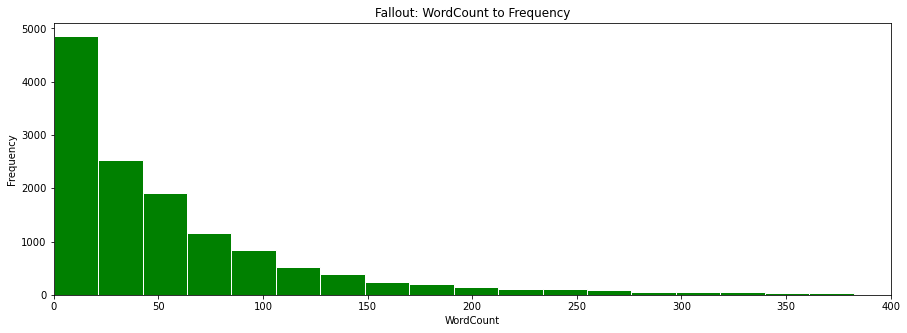

In [31]:
plt.figure(figsize = (15,5))
plt.hist(falloutresults["selftextwordcount"],
    color = "green",
    ec = "white",
        bins=300);
plt.title("Fallout: WordCount to Frequency")
plt.xlabel("WordCount")
plt.ylabel("Frequency");
plt.xlim(0,400);

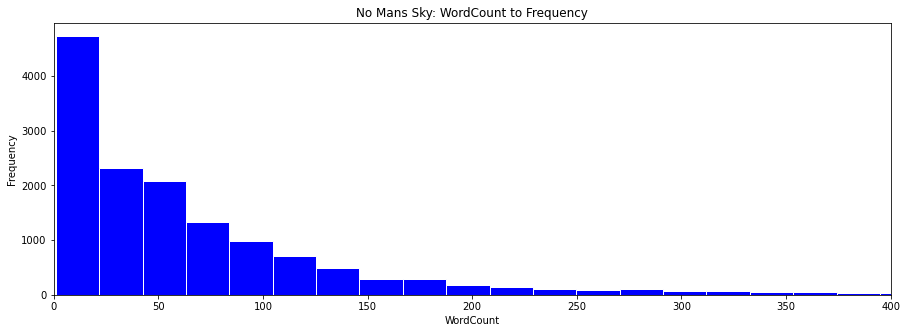

In [32]:
plt.figure(figsize = (15,5))
plt.hist(nomansskyresults["selftextwordcount"],
    color = "blue",
    ec = "white",
        bins=300);
plt.title("No Mans Sky: WordCount to Frequency")
plt.xlabel("WordCount")
plt.ylabel("Frequency");
plt.xlim(0,400);

# Preprocessing

### Separate Features for Modeling

In [33]:
# Select Important Features for Modeling
selectedfeatures = bothsets[['selftext','subreddit']]
selectedfeatures.head(1)

,selftext,subreddit
1,"Idk but the whole ""replace humans with synths ...",Fallout


In [34]:
selectedfeatures['subreddit'] = selectedfeatures['subreddit'].map({'Fallout':1, 'NoMansSkyTheGame':0})

In [35]:
selectedfeatures['subreddit'].value_counts()

0    11374
1    11062
Name: subreddit, dtype: int64

In [36]:
custom = ['game','just','like','new','ve','know','com','do','https','really','time','want','people','way','make','think','people']
combined_words = text.ENGLISH_STOP_WORDS.union(custom)

In [37]:
def clean_strings(input_list, stopwords = []):
    import re # we'll use regex to strip urls
    output_list = [] # create output list
    stopwords = [word.lower() for word in stopwords] # ensure case insensitivity for stopwords
    for sentence in input_list:
        sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence, flags=re.MULTILINE) # remove URLS per stackoverflow
        sentence = sentence.replace('https', '')
        sentence = sentence.replace('\n',' ') # replace \n and \t with spaces as they represent breaks between words
        sentence = sentence.replace('\t',' ')
        sentence = ''.join([letter for letter in sentence if letter.isalpha() or letter == ' ']) #remove numbers and punctuation
        sentence = ' '.join([word.lower() for word in sentence.split() if word.lower() not in stopwords]) #coerce to lowercase while removing stopwords
        output_list.append(sentence) # add to the output list
    return output_list

In [38]:
selectedfeatures['cleantext'] = clean_strings(selectedfeatures['selftext'], stopwords=combined_words)
tokenizer = RegexpTokenizer('\w+')
selectedfeatures['cleantexttokenized'] = selectedfeatures.apply(lambda row: tokenizer.tokenize(row['cleantext'].lower()), axis=1)
lemmatizer = WordNetLemmatizer()
cleantexttokenizedlem = [[lemmatizer.lemmatize(word) for word in row] for row in selectedfeatures['cleantexttokenized']]
selectedfeatures['cleantexttokenizedlem'] = cleantexttokenizedlem
selectedfeatures['cleantexttokenized'] = selectedfeatures['cleantexttokenized'].map(lambda x: ' '.join(x))
selectedfeatures['cleantexttokenizedlem'] = selectedfeatures['cleantexttokenizedlem'].map(lambda x: ' '.join(x))
tokenizer = RegexpTokenizer('\w+')
selectedfeatures['tokenized'] = selectedfeatures.apply(lambda row: tokenizer.tokenize(row['selftext'].lower()), axis=1)
lemmatizer = WordNetLemmatizer()
lemtokens1 = [[lemmatizer.lemmatize(word) for word in row] for row in selectedfeatures['tokenized']]
selectedfeatures['lemtokenized'] = lemtokens1
selectedfeatures['tokenized'] = selectedfeatures['tokenized'].map(lambda x: ' '.join(x))
selectedfeatures['lemtokenized'] = selectedfeatures['lemtokenized'].map(lambda x: ' '.join(x))

In [39]:
selectedfeatures.head(1)

,selftext,subreddit,cleantext,cleantexttokenized,cleantexttokenizedlem,tokenized,lemtokenized
1,"Idk but the whole ""replace humans with synths ...",1,idk replace humans synths mysterious institute...,idk replace humans synths mysterious institute...,idk replace human synths mysterious institute ...,idk but the whole replace humans with synths f...,idk but the whole replace human with synths fr...


In [40]:
pwd!

'/Users/ch/Desktop/GA/Projects/project_3'

In [41]:
selectedfeatures.shape

(22436, 7)

In [42]:
selectedfeatures.isnull().sum()

selftext                 0
subreddit                0
cleantext                0
cleantexttokenized       0
cleantexttokenizedlem    0
tokenized                0
lemtokenized             0
dtype: int64

# EXPORT COMPLETE DATASETS TO DATASET DIRECTORY

In [43]:
bothsets.to_csv('Datasets/bothsets.csv', index = False)

In [44]:
selectedfeatures.shape

(22436, 7)

In [45]:
selectedfeatures.isnull().sum()

selftext                 0
subreddit                0
cleantext                0
cleantexttokenized       0
cleantexttokenizedlem    0
tokenized                0
lemtokenized             0
dtype: int64

In [46]:
selectedfeatures.to_csv('Datasets/selectedfeatures.csv', index = False)

## Most Common Words both Datasets Before and After Stopword Removal

<Figure size 1080x1080 with 0 Axes>

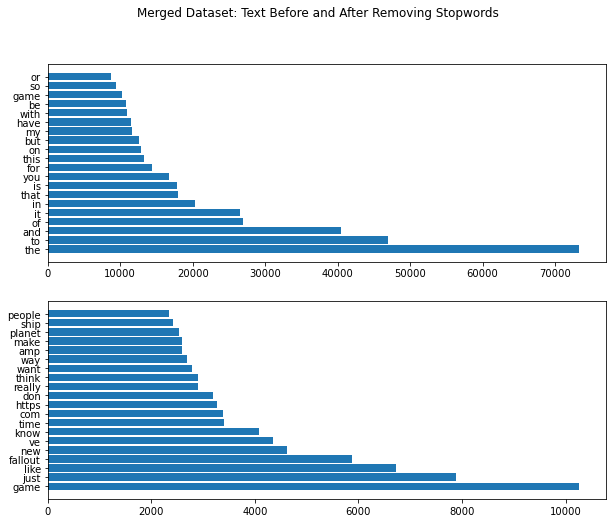

In [47]:
X = selectedfeatures['selftext']
y = selectedfeatures['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer()
X_train = cvec.fit_transform(X_train)
X_test = cvec.transform(X_test)
X_train_df = pd.DataFrame(X_train.todense(),columns=cvec.get_feature_names())
selectedfeaturesbeforestopword = X_train_df.sum().sort_values(ascending=False).head(20)

Xsw = selectedfeatures['selftext']
ysw = selectedfeatures['subreddit']
Xsw_train, Xsw_test, ysw_train, ysw_test = train_test_split(Xsw,ysw,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer(stop_words = 'english')
Xsw_train = cvec.fit_transform(Xsw_train)
Xsw_test = cvec.transform(Xsw_test)
Xsw_train_df = pd.DataFrame(Xsw_train.todense(),columns=cvec.get_feature_names())
selectedfeaturesafterstopword = Xsw_train_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize = (15, 15))
temp = pd.DataFrame({"selectedfeaturesbeforestopword": selectedfeaturesbeforestopword.index,"selectedfeaturesafterstopword": selectedfeaturesafterstopword.index})
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
fig.suptitle("Merged Dataset: Text Before and After Removing Stopwords");
ax1.barh(temp.selectedfeaturesbeforestopword, selectedfeaturesbeforestopword, height=0.8)
ax2.barh(temp.selectedfeaturesafterstopword, selectedfeaturesafterstopword, height=0.8);

## Most Common Words Fallout  Before and After Stopword Removal

<Figure size 1080x1080 with 0 Axes>

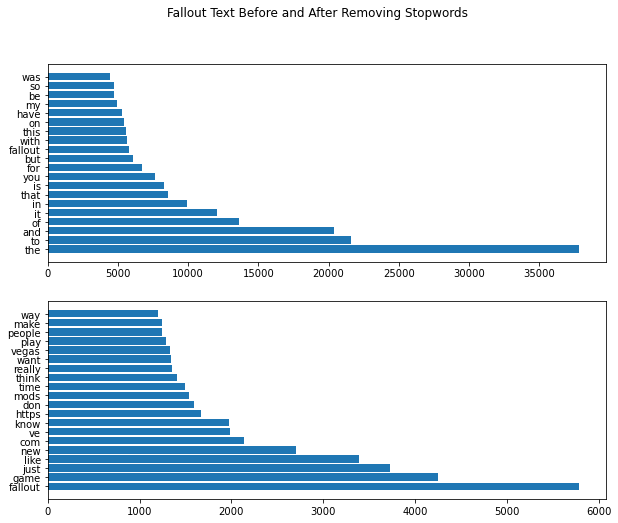

In [48]:
falloutresults1 = selectedfeatures[(selectedfeatures['subreddit']==1)]
X = falloutresults1['selftext']
y = falloutresults1['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer()
X_train = cvec.fit_transform(X_train)
X_test = cvec.transform(X_test)
X_train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names())
falloutbeforestopword = X_train_df.sum().sort_values(ascending=False).head(20)

X = falloutresults1['selftext']
y = falloutresults1['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer(stop_words = 'english')
X_train = cvec.fit_transform(X_train)
X_test = cvec.transform(X_test)
X_train_df = pd.DataFrame(X_train.todense(),columns=cvec.get_feature_names())
falloutafterstopword = X_train_df.sum().sort_values(ascending=False).head(20)
plt.figure(figsize = (15, 15))
tempdf1 = pd.DataFrame({"falloutbeforestopword": falloutbeforestopword.index,"falloutafterstopword": falloutafterstopword.index})
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))

fig.suptitle("Fallout Text Before and After Removing Stopwords");
ax1.barh(tempdf1.falloutbeforestopword, falloutbeforestopword, height=0.8)
ax2.barh(tempdf1.falloutafterstopword, falloutafterstopword, height=0.8);

## Most Common Words NoMansSky  Before After Stopword Removal

<Figure size 1080x1080 with 0 Axes>

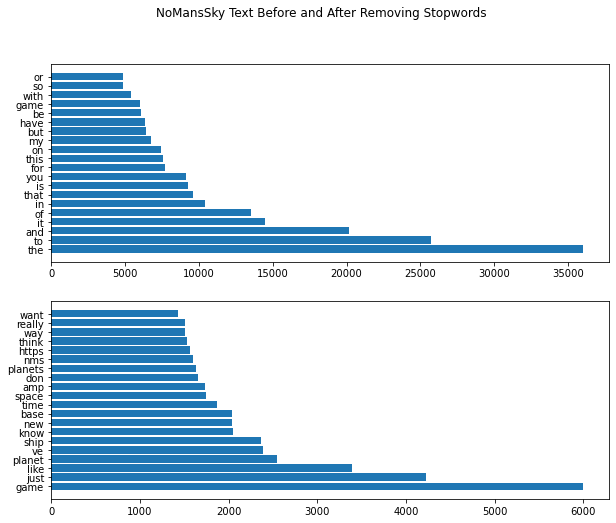

In [49]:
nomansskyresults1 = selectedfeatures[(selectedfeatures['subreddit']==0)]
X = nomansskyresults1['selftext']
y = nomansskyresults1['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer()
X_train = cvec.fit_transform(X_train)
X_test = cvec.transform(X_test)
X_train_df = pd.DataFrame(X_train.todense(),columns=cvec.get_feature_names())
nomansskybeforestopword = X_train_df.sum().sort_values(ascending=False).head(20)

X = nomansskyresults1['selftext']
y = nomansskyresults1['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
cvec = CountVectorizer(stop_words = 'english')
X_train = cvec.fit_transform(X_train)
X_test = cvec.transform(X_test)
X_train_df = pd.DataFrame(X_train.todense(),columns=cvec.get_feature_names())
nomansskyafterstopword = X_train_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize = (15, 15))
tempdf2 = pd.DataFrame({"nomansskybeforestopword": nomansskybeforestopword.index,"nomansskyafterstopword": nomansskyafterstopword.index})
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
fig.suptitle("NoMansSky Text Before and After Removing Stopwords");
ax1.barh(tempdf2.nomansskybeforestopword, nomansskybeforestopword, height=0.8)
ax2.barh(tempdf2.nomansskyafterstopword, nomansskyafterstopword, height=0.8);

<Figure size 1080x1080 with 0 Axes>

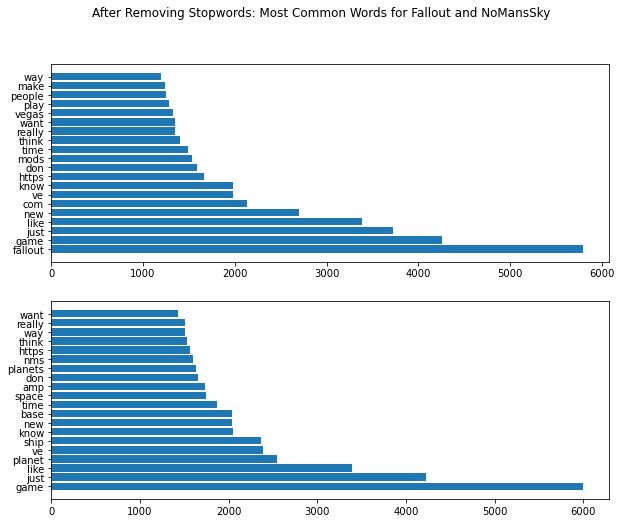

In [50]:
plt.figure(figsize = (15, 15))
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
fig.suptitle("After Removing Stopwords: Most Common Words for Fallout and NoMansSky");
ax1.barh(tempdf1.falloutafterstopword, falloutafterstopword, height=0.8)
ax2.barh(tempdf2.nomansskyafterstopword, nomansskyafterstopword, height=0.8);

In [51]:
selectedfeaturesafterstopword

game       10264
just        7886
like        6719
fallout     5877
new         4628
ve          4358
know        4073
time        3411
com         3387
https       3274
don         3187
really      2904
think       2904
want        2780
way         2688
amp         2590
make        2585
planet      2535
ship        2408
people      2333
dtype: int64

In [52]:
newstopwords = ['game','just','like','new','ve','know','com','do','https','really','time','want','people','way','make','think','people']

In [53]:
newstopwords = pd.DataFrame(newstopwords)

In [54]:
newstopwords.to_csv('Datasets/newstopwords',index=False)

In [55]:
nomansskyafterstopword1 = X_train_df.sum().sort_values(ascending=False).head(50)